# Not Another Dimensionality Reduction Tutorial - Appendix

Matt Stone  
30 Nov 2019

This appendix contains supplemental code to generate some of the figures included in the tutorial.

In [3]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_palette('colorblind')

import numpy as np

## 2. Background

### Helper functions

Generate random points in two "rings"

In [2]:
def sample_points(n_points, z_height, radius):
    zdata = np.random.normal(z_height, 0.1, n_points)
    xdata, ydata = radius * sample_spherical(n_points)
    
    return xdata, ydata, zdata

def sample_spherical(npoints, ndim=2):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

np.random.seed(149)
x1, y1, z1 = sample_points(100, 1, 1)
x2, y2, z2 = sample_points(100, 4, 3)

Plot our rings in 3D space

In [4]:
def plot_points(ax):    
    # Data for three-dimensional scattered points
    ax.scatter3D(x1, y1, z1, 'o', alpha=1, c='red');
    ax.scatter3D(x2, y2, z2, 'o', alpha=1, c='blue');
    
    ax.grid(False)
    
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.set_zlabel('Z', fontsize=14)
    
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-1, 5)
    ax.set_xticks(np.arange(-4, 6, 2))
    ax.set_yticks(np.arange(-4, 6, 2))
    ax.set_zticks(np.arange(0, 6, 2))

Plot rings with vertical lines corresponding to projections of some data points onto the X-Y plane

In [8]:
def plot_projections(ax, n=1):
    idxs = np.arange(100).astype(int)
    if n == 1:
        idxs = [5]
    else:
        idxs = idxs[:n]
    
    for idx in idxs:
        ax.plot3D([x1[idx], x1[idx]], [y1[idx], y1[idx]], [0, z1[idx]], color='red')
        ax.plot3D([x2[idx], x2[idx]], [y2[idx], y2[idx]], [0, z2[idx]], color='blue')

Plot the 2D projection (x-y coordinates) in 2D space

In [9]:
def plot_2d(ax):
    ax.scatter(x1, y1, color='red')
    ax.scatter(x2, y2, color='blue')
    
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_xticks(np.arange(-4, 6, 2))
    ax.set_yticks(np.arange(-4, 6, 2))

### Fig 2.1 Floating rings

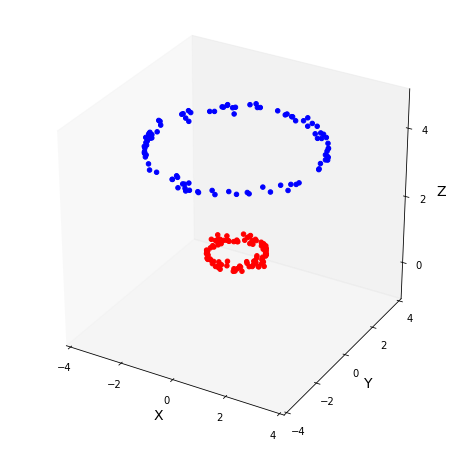

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plot_points(ax)

plt.savefig('circles.png', bbox_inches='tight')

### Fig 2.2 Rotated views of the rings in the coordinate planes

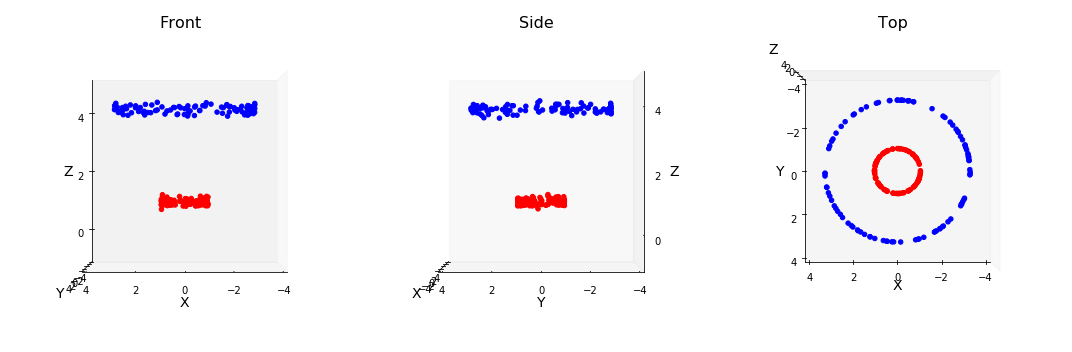

In [6]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(131, projection='3d')
plot_points(ax)
ax.view_init(0, 90)
ax.set_title("Front", fontsize=16)

ax = fig.add_subplot(132, projection='3d')
plot_points(ax)
ax.view_init(0, 180)
ax.set_title("Side", fontsize=16)

ax = fig.add_subplot(133, projection='3d')
plot_points(ax)
ax.view_init(90, 90)
ax.set_title("Top", fontsize=16)

plt.tight_layout()

plt.savefig('circles_rotated.png', bbox_inches='tight')

### Fig 2.3 Projection onto X-Y plane

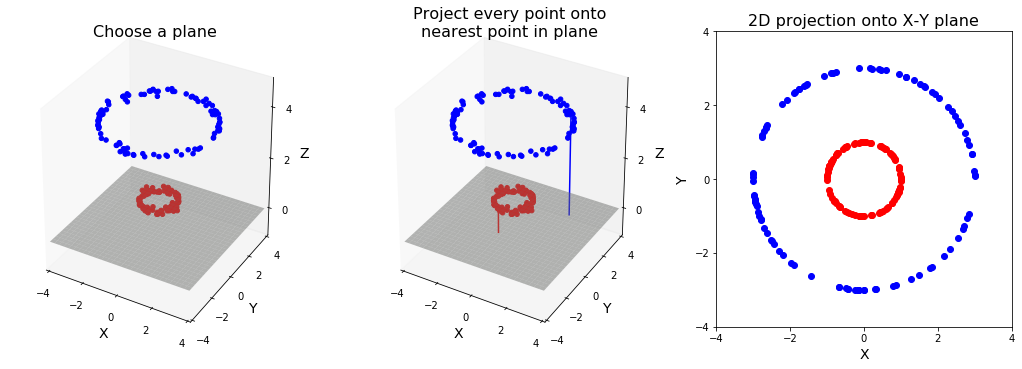

In [11]:
fig = plt.figure(figsize=(18, 6))

x = y = np.linspace(-4, 4, 30)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

ax = fig.add_subplot(131, projection='3d')
plot_points(ax)
ax.plot_surface(X, Y, Z, color=sns.xkcd_rgb['light grey'], alpha = 0.5)
ax.set_title("Choose a plane", fontsize=16)
# ax.view_init(10, -60)

ax = fig.add_subplot(132, projection='3d')
plot_points(ax)
ax.plot_surface(X, Y, Z, color=sns.xkcd_rgb['light grey'], alpha = 0.5)
plot_projections(ax, n=1)
ax.set_title("Project every point onto\nnearest point in plane", fontsize=16)
# ax.view_init(10, -60)

ax = fig.add_subplot(133)
plot_2d(ax)
ax.set_title("2D projection onto X-Y plane", fontsize=16)
ax.set_aspect('equal')

plt.savefig('projection.png', bbox_inches='tight')

TODO: intuition for nonlinear algorithms as learning a manifold - "uncurling a surface", swiss roll

## 3. Algorithms

### 3.1 PCA

Generate a 2-D gaussian, and rotate it 45 degrees

In [135]:
np.random.seed(149)
ydata = np.random.normal(0, 1, 100)
xdata = np.random.normal(0, 3, 100)

def rotate(data, theta):
    R = np.array([[np.cos(theta), - np.sin(theta)], 
                  [np.sin(theta), np.cos(theta)]])

    return data.dot(R)

data = rotate(np.array([xdata, ydata]).T, -np.pi / 4)

In [136]:
def plot_pca_points(ax):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    ax.set_xlim(-7, 9)
    ax.set_ylim(-7, 9)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

### Fig 3.1 PCA data

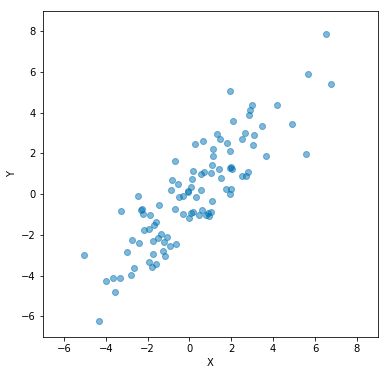

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_pca_points(ax)

In [109]:
def plot_pca_projections(ax, n=1, proj='x'):
    idxs = np.arange(100).astype(int)
    if n == 1:
        idxs = [5]
    else:
        idxs = idxs[:n]
    
    for idx in idxs:
        x, y = data[idx]
        if proj == 'x':
            ax.plot([x, x], [0, y])
        elif proj == 'y':
            ax.plot([0, x], [y, y])
        else:
            p = (data[idx].dot(proj) / proj.dot(proj)) * proj
            ax.plot([x, p[0]], [y, p[1]])


### Fig 3.2 PCA algorithm

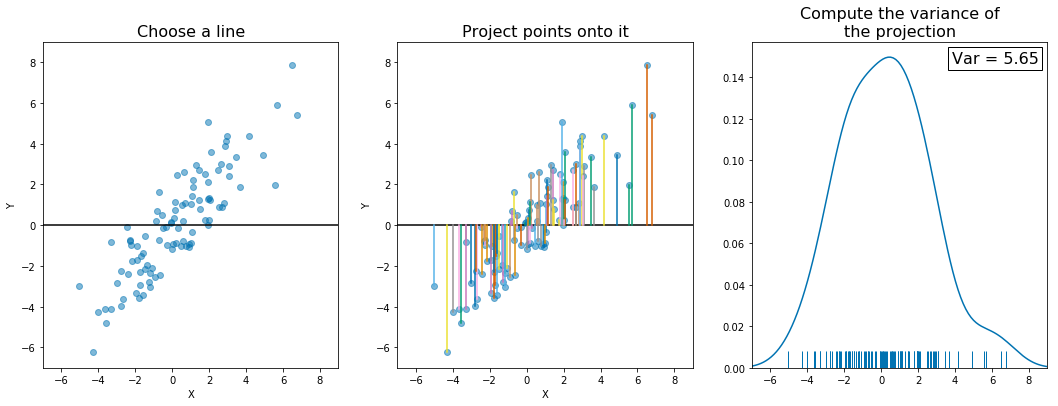

In [187]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = axes[0]
plot_pca_points(ax)
ax.axhline(0, color='k')
ax.set_title('Choose a line', fontsize=16)

ax = axes[1]
plot_pca_points(ax)
ax.axhline(0, color='k')
plot_pca_projections(ax, n=100, proj='x')
ax.set_title('Project points onto it', fontsize=16)

ax = axes[2]
ax = sns.distplot(data[:, 0], rug=True, hist=False, kde=True)
var = np.var(data[:, 0])
ax.text(0.97, 0.97, 'Var = {:.02f}'.format(var), 
        fontsize=16, bbox=dict(facecolor='white', edgecolor='k'),
        va='top', ha='right', transform=ax.transAxes)
ax.set_xlim(-7, 9)
ax.set_title('Compute the variance of\nthe projection', fontsize=16)

plt.savefig('figs/pca_steps.png', bbox_inches='tight')

In [120]:
def project(data, s):
    proj = np.zeros(data.shape)
    
    for idx in np.arange(data.shape[0]):
        proj[idx] = (data[idx].dot(s) / s.dot(s)) * s
        
    return proj

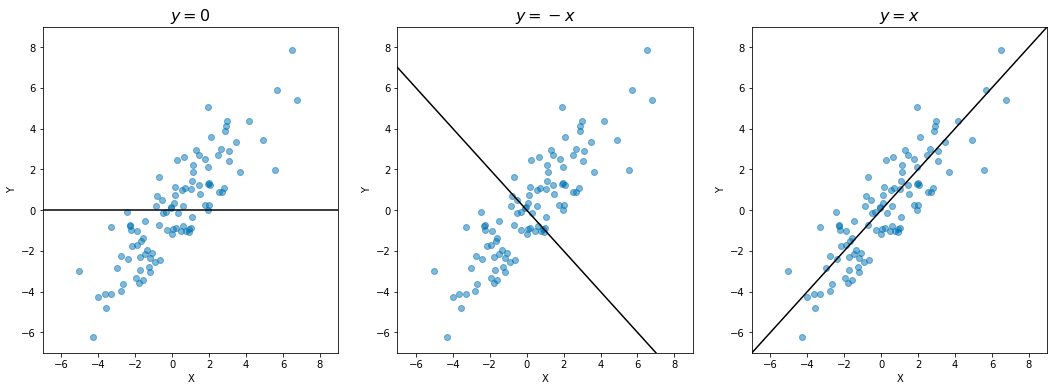

In [193]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = axes[0]
plot_pca_points(ax)
ax.axhline(0, color='k')
ax.set_title(r'$y=0$', fontsize=16)

ax = axes[1]
plot_pca_points(ax)
ax.plot((-10, 10), (10, -10), color='k')
ax.set_title(r'$y=-x$', fontsize=16)

ax = axes[2]
plot_pca_points(ax)
ax.plot((-10, 10), (-10, 10), color='k')
ax.set_title(r'$y=x$', fontsize=16)

plt.savefig('figs/pca_compare_lines.png', bbox_inches='tight')

/Users/msto/.miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.
/Users/msto/.miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


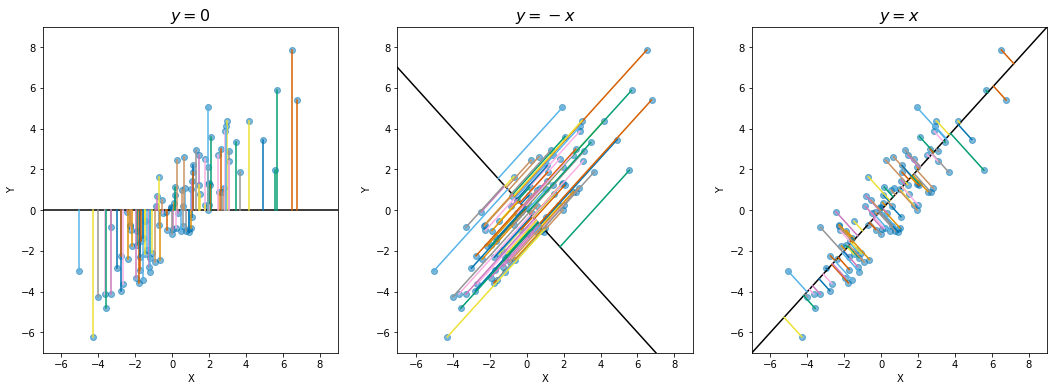

In [194]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = axes[0]
plot_pca_points(ax)
ax.axhline(0, color='k')
ax.set_title(r'$y=0$', fontsize=16)
plot_pca_projections(ax, n=100, proj='x')

ax = axes[1]
plot_pca_points(ax)
ax.plot((-10, 10), (10, -10), color='k')
ax.set_title(r'$y=-x$', fontsize=16)
plot_pca_projections(ax, n=100, proj=np.array([-1, 1]))

ax = axes[2]
plot_pca_points(ax)
ax.plot((-10, 10), (-10, 10), color='k')
ax.set_title(r'$y=x$', fontsize=16)
plot_pca_projections(ax, n=100, proj=np.array([1, 1]))

plt.savefig('figs/pca_compare_projections.png', bbox_inches='tight')

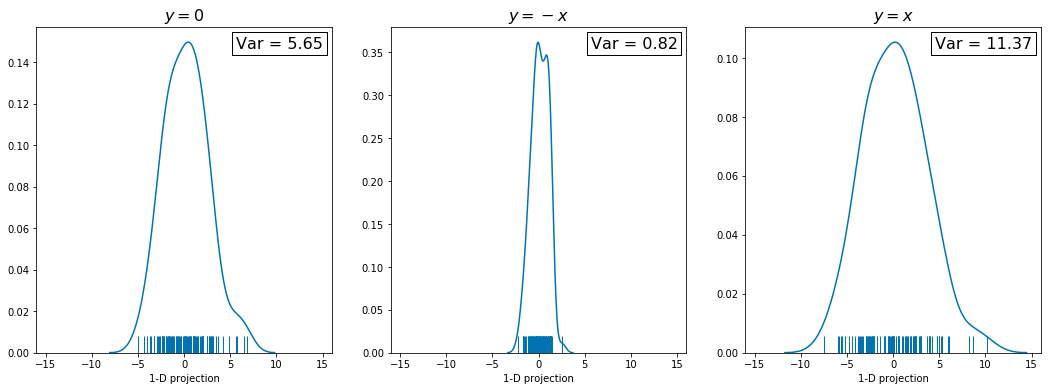

In [205]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = axes[0]
ax.set_title(r'$y=0$', fontsize=16)

ax = sns.distplot(data[:, 0], rug=True, hist=False, ax=ax)
var = np.var(data[:, 0])
ax.text(0.97, 0.97, 'Var = {:.02f}'.format(var), 
        fontsize=16, bbox=dict(facecolor='white', edgecolor='k'),
        va='top', ha='right', transform=ax.transAxes)

ax = axes[1]
ax.set_title(r'$y=-x$', fontsize=16)

proj = project(data, np.array([-1, 1]))
proj = rotate(proj, -np.pi / 4)
ax = sns.distplot(proj[:, 0], rug=True, hist=False, kde=True, ax=ax)
var = np.var(proj[:, 0])
ax.text(0.97, 0.97, 'Var = {:.02f}'.format(var), 
        fontsize=16, bbox=dict(facecolor='white', edgecolor='k'),
        va='top', ha='right', transform=ax.transAxes)

ax = axes[2]
ax.set_title(r'$y=x$', fontsize=16)

proj = project(data, np.array([1, 1]))
proj = rotate(proj, np.pi / 4)
ax = sns.distplot(proj[:, 0], rug=True, hist=False, kde=True, ax=ax)
var = np.var(proj[:, 0])
ax.text(0.97, 0.97, 'Var = {:.02f}'.format(var), 
        fontsize=16, bbox=dict(facecolor='white', edgecolor='k'),
        va='top', ha='right', transform=ax.transAxes)

for ax in axes:
    ax.set_xlim(-16, 16)
    ax.set_xticks(np.arange(-15, 20, 5))
    ax.set_xlabel('1-D projection')
    
plt.savefig('figs/pca_compare_variance.png', bbox_inches='tight')

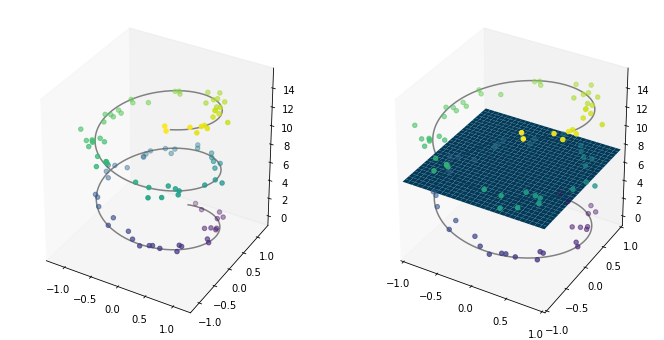

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(131, projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');
ax.grid(False)
# ax.axis('Off')

# ax = plt.axes()
# ax.plot([0, 0], [1, 1])
ax = fig.add_subplot(132, projection='3d')
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)

X, Y = np.meshgrid(x, y)
Z = 7.5 * np.ones(X.shape)
ax.plot_surface(X, Y, Z)
ax.grid(False)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))

## 3. Dimensionality reduction algorithms

## 4. Demonstration of PCA, t-SNE, and UMAP

## 5. TODOs for final draft

- Flesh out mathematical intuition
- Add examples of clustering algorithms
- Add examples on 10X PBMC data to tie back to Garnett discussion (much larger dataset so algorithms are slower)
- Add ISOMAP, Laplacian Eigenmaps - maybe introduce relationship with UMAP
- Expand on other parameters that each algorithm takes, show examples of what happens when we change them